In [77]:
# Bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Selecionando as features
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Criação de modelo treino e teste
from sklearn.model_selection import train_test_split

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Pré processamento dos dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Métricas para validação
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

# Cálculo do Base Line
from sklearn.dummy import DummyClassifier


# Importando dados

In [78]:
dados = pd.read_csv('https://raw.githubusercontent.com/renanwta/Red-Wine/main/winequality-red.csv', sep = ';')

# Conhecendo os dados

In [79]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [80]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [81]:
dados.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Observando os outliers

<ipython-input-82-600543a37cf8>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados,x = dados[dic_col[col]], kde = False, ax = axs[i,j])


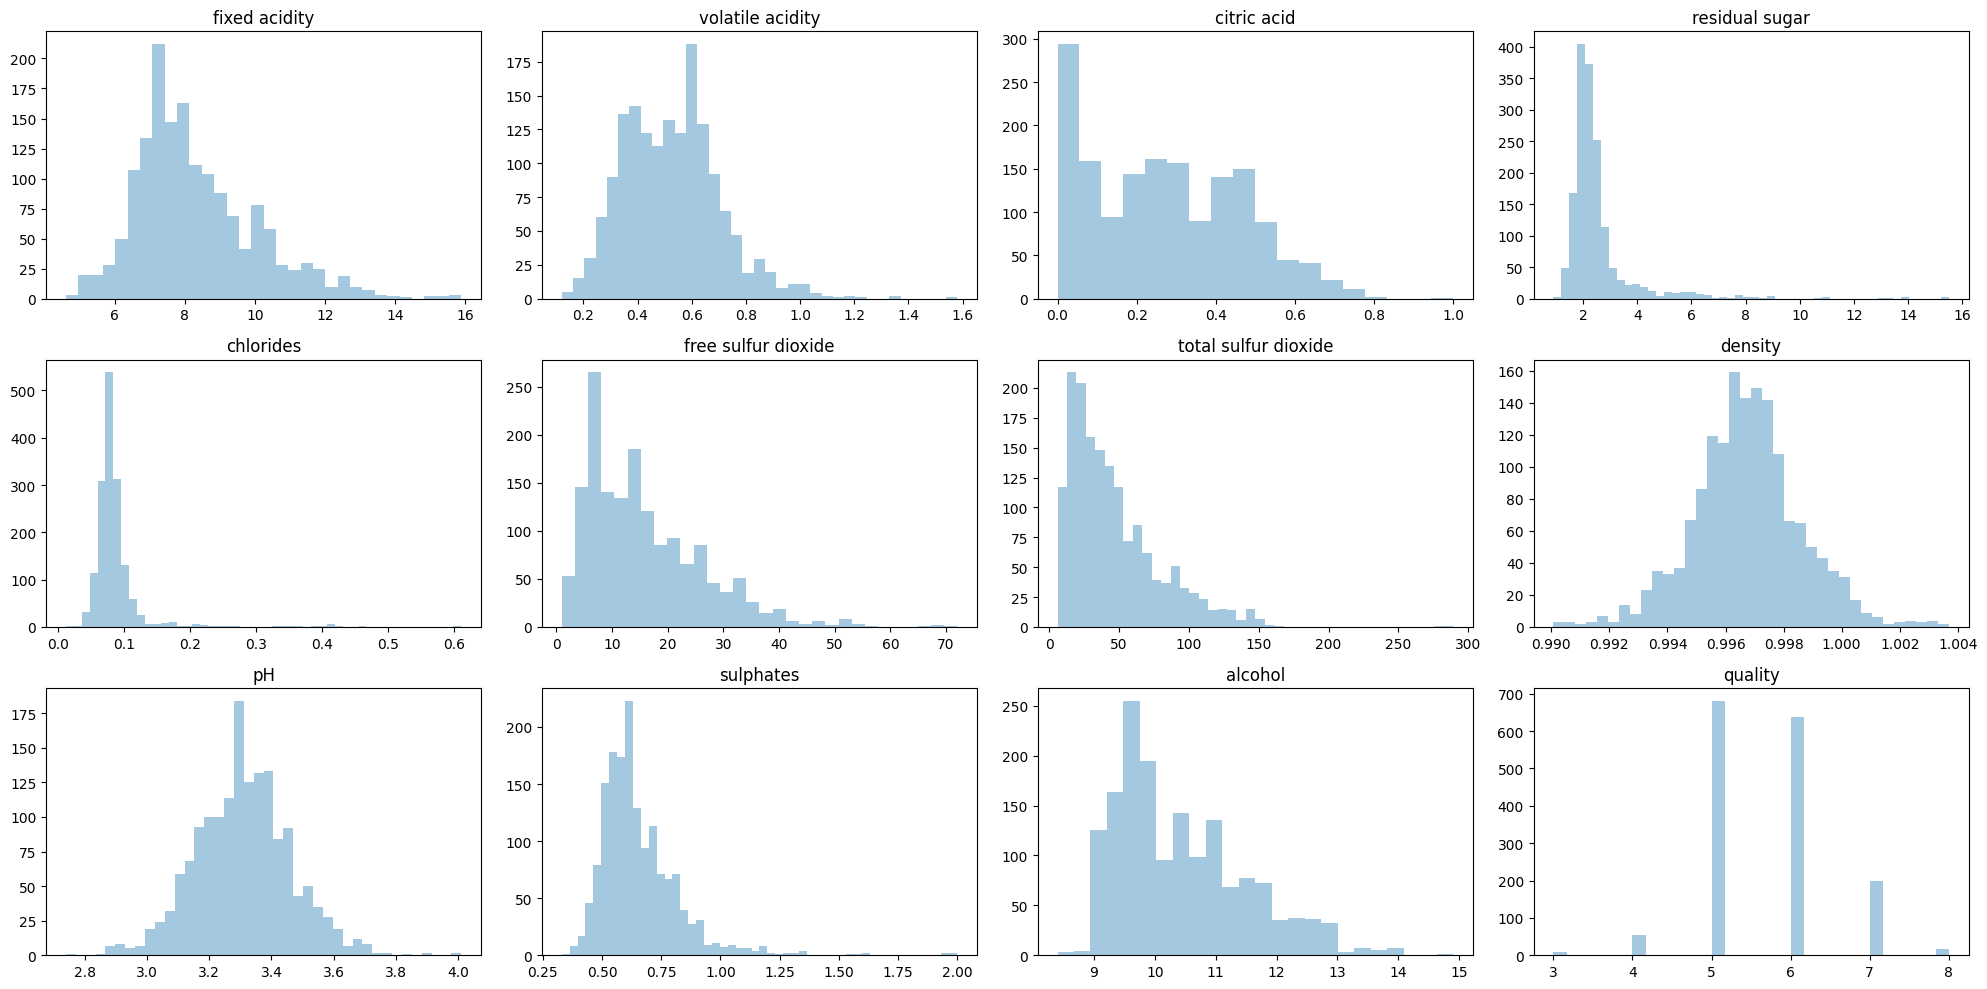

In [82]:
fig, axs = plt.subplots(3, 4, figsize=(20,10))

dic_col = {
        0:'fixed acidity',
        1: 'volatile acidity',
        2: 'citric acid',
        3: 'residual sugar',
        4: 'chlorides',
        5: 'free sulfur dioxide',
        6: 'total sulfur dioxide',
        7: 'density',
        8: 'pH',
        9: 'sulphates',
       10: 'alcohol',
       11: 'quality'}

col = 0

for i in range (3):
  for j in range(4):
    sns.distplot(dados,x = dados[dic_col[col]], kde = False, ax = axs[i,j])
    axs[i,j].set_title(dic_col[col])
    col = col + 1
plt.tight_layout()
plt.show()

A utilização do histograma permite a vizualização da distribuição dos dados e a observação de presenças de outliers, assim é possível observar fortes presenças de outliers em algumas das features.

## Tratando os outliers

Nessa etapa será feito o tratamento dos outliers, o método utilizado foi a IQR Method, onde é criado um limite superior e inferior, assim os dados que estão fora desses limites são descartados.

esse tratamento foi utilizado em todas as features

Text(0.5, 1.0, 'fixed acidity')

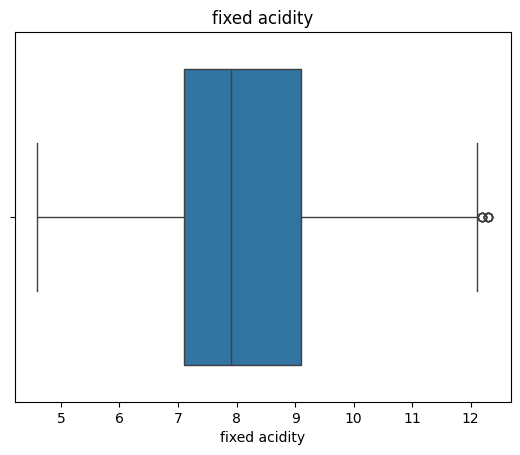

In [83]:
# IQR Method - Inter quartile
q1 = dados['fixed acidity'].quantile(0.25)
q3 = dados['fixed acidity'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados1 = dados.loc[(dados['fixed acidity'] < upper_limit) & (dados['fixed acidity'] > lower_limit)]


ax = sns.boxplot(new_dados1, x = new_dados1['fixed acidity'])
ax.set_title('fixed acidity')


Text(0.5, 1.0, 'volatile acidity')

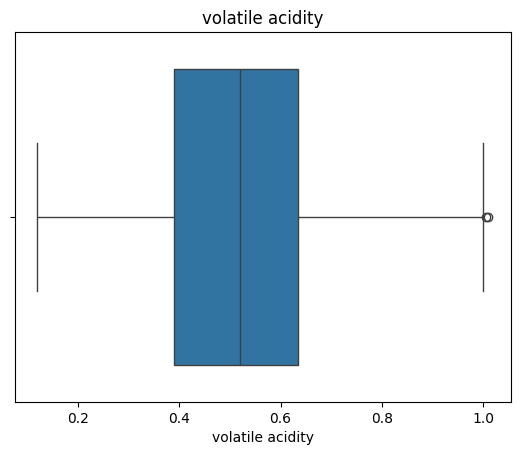

In [84]:

# IQR Method - Inter quartile

q1 = dados['volatile acidity'].quantile(0.25)
q3 = dados['volatile acidity'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados2 = new_dados1.loc[(dados['volatile acidity'] < upper_limit) & (new_dados1['volatile acidity'] > lower_limit)]


ax = sns.boxplot(new_dados2, x = new_dados2['volatile acidity'])
ax.set_title('volatile acidity')


Text(0.5, 1.0, 'chlorides')

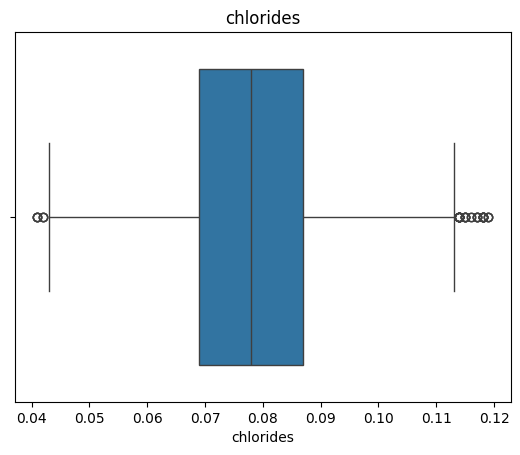

In [85]:

q1 = dados['chlorides'].quantile(0.25)
q3 = dados['chlorides'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados3 = new_dados2.loc[(dados['chlorides'] < upper_limit) & (new_dados2['chlorides'] > lower_limit)]


ax = sns.boxplot(new_dados3, x = new_dados3['chlorides'])
ax.set_title('chlorides')

Text(0.5, 1.0, 'residual sugar')

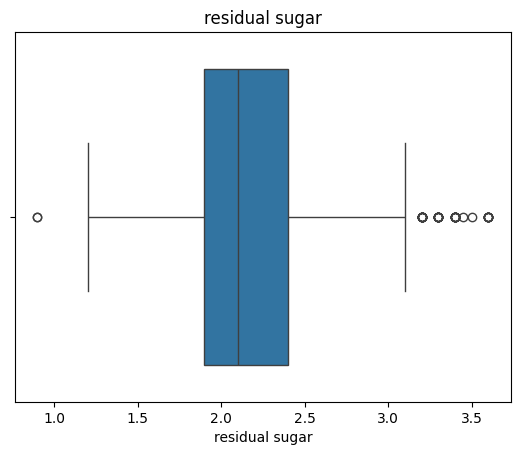

In [86]:

q1 = dados['residual sugar'].quantile(0.25)
q3 = dados['residual sugar'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados4 = new_dados3.loc[(dados['residual sugar'] < upper_limit) & (new_dados3['residual sugar'] > lower_limit)]


ax = sns.boxplot(new_dados4, x = new_dados4['residual sugar'])
ax.set_title('residual sugar')

Text(0.5, 1.0, 'free sulfur dioxide')

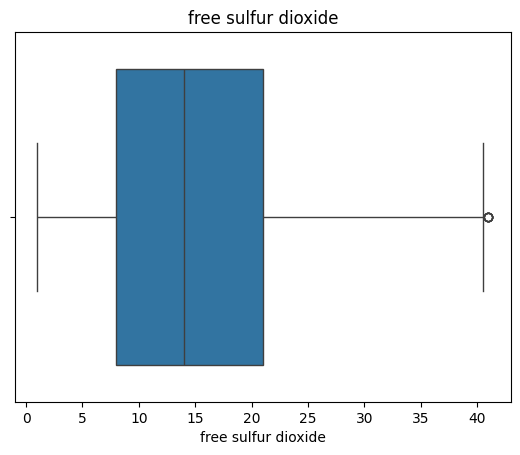

In [87]:

q1 = dados['free sulfur dioxide'].quantile(0.25)
q3 = dados['free sulfur dioxide'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados5 = new_dados4.loc[(dados['free sulfur dioxide'] < upper_limit) & (new_dados4['free sulfur dioxide'] > lower_limit)]


ax = sns.boxplot(new_dados5, x = new_dados5['free sulfur dioxide'])
ax.set_title('free sulfur dioxide')

Text(0.5, 1.0, 'total sulfur dioxide')

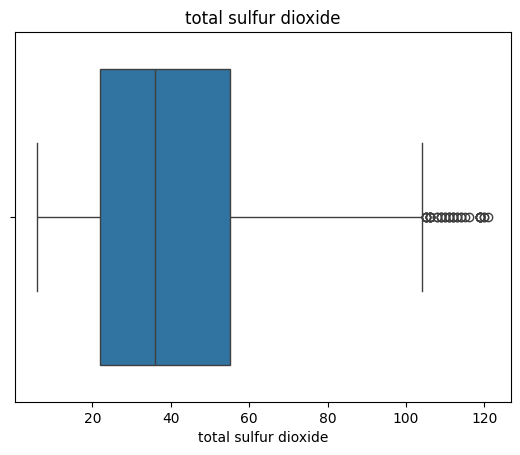

In [88]:

q1 = dados['total sulfur dioxide'].quantile(0.25)
q3 = dados['total sulfur dioxide'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados6 = new_dados5.loc[(dados['total sulfur dioxide'] < upper_limit) & (new_dados5['total sulfur dioxide'] > lower_limit)]


ax = sns.boxplot(new_dados6, x = new_dados6['total sulfur dioxide'])
ax.set_title('total sulfur dioxide')

Text(0.5, 1.0, 'density')

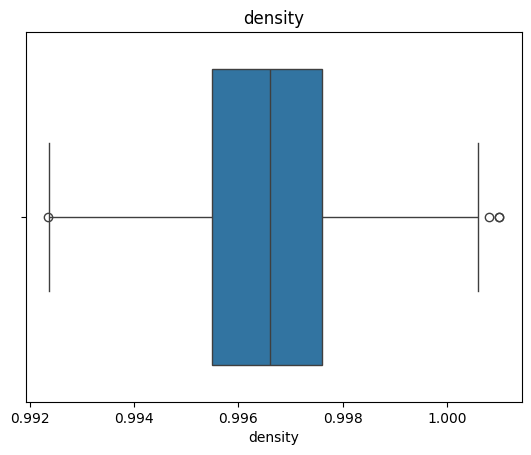

In [89]:

q1 = dados['density'].quantile(0.25)
q3 = dados['density'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados7 = new_dados6.loc[(dados['density'] < upper_limit) & (new_dados6['density'] > lower_limit)]


ax = sns.boxplot(new_dados7, x = new_dados7['density'])
ax.set_title('density')

Text(0.5, 1.0, 'pH')

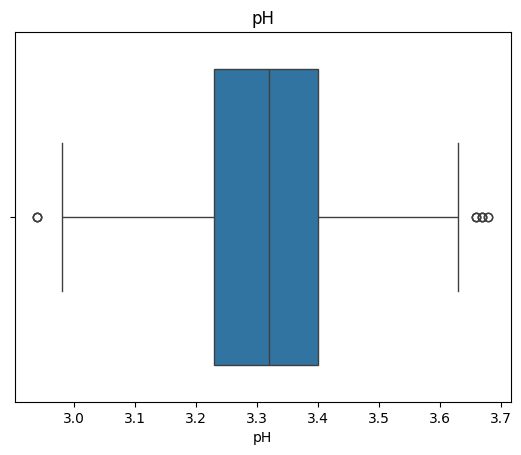

In [90]:

q1 = dados['pH'].quantile(0.25)
q3 = dados['pH'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados8 = new_dados7.loc[(dados['pH'] < upper_limit) & (new_dados7['pH'] > lower_limit)]


ax = sns.boxplot(new_dados8, x = new_dados8['pH'])
ax.set_title('pH')

Text(0.5, 1.0, 'sulphates')

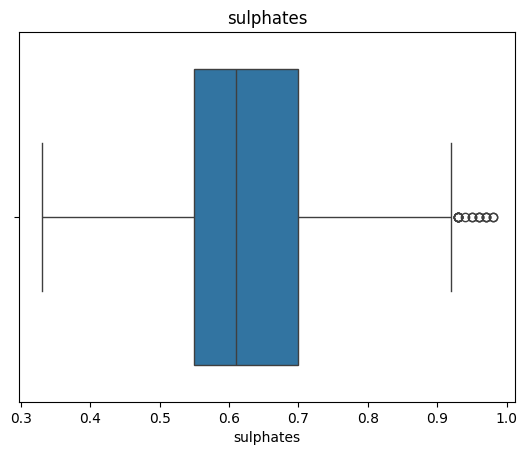

In [91]:

# IQR Method - Inter quartile
q1 = dados['sulphates'].quantile(0.25)
q3 = dados['sulphates'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados9 = new_dados8.loc[(dados['sulphates'] < upper_limit) & (new_dados8['sulphates'] > lower_limit)]


ax = sns.boxplot(new_dados9, x = new_dados9['sulphates'])
ax.set_title('sulphates')

Text(0.5, 1.0, 'alcohol')

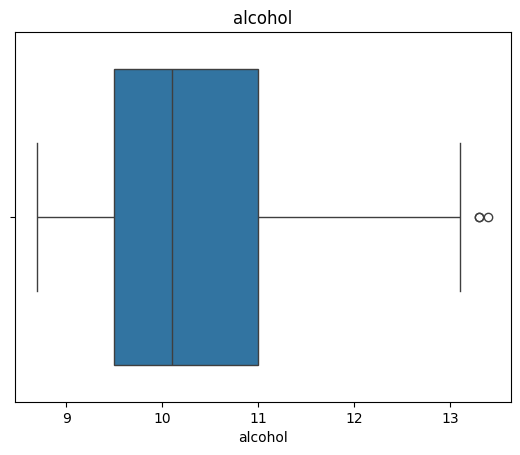

In [92]:

# IQR Method - Inter quartile
q1 = dados['alcohol'].quantile(0.25)
q3 = dados['alcohol'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

new_dados10 = new_dados9.loc[(dados['alcohol'] < upper_limit) & (new_dados9['alcohol'] > lower_limit)]


ax = sns.boxplot(new_dados10, x = new_dados10['alcohol'])
ax.set_title('alcohol')

## Histogramas após o tratamento

In [93]:
len(new_dados10), len(dados)

(1190, 1599)

<ipython-input-94-3ddb16375f70>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados,x = new_dados10[dic_col[col]], kde = False, ax = axs[i,j])


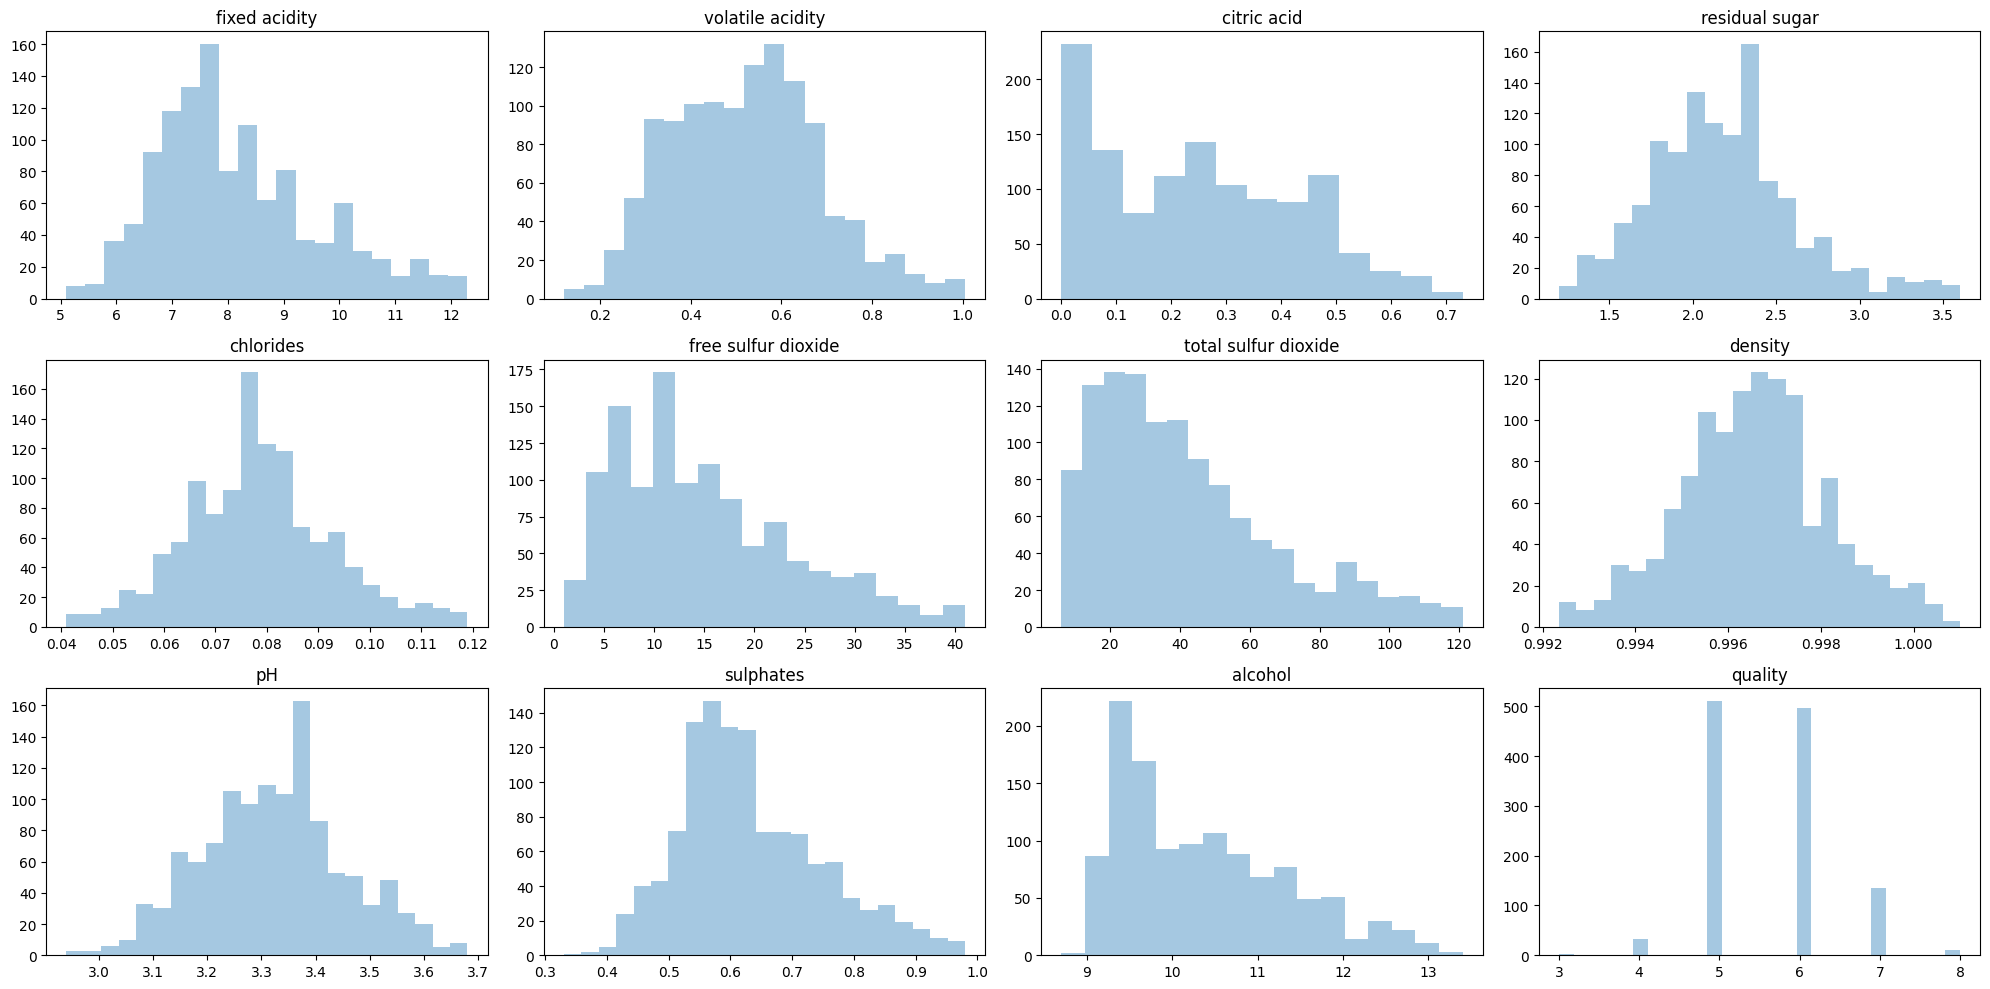

In [94]:
fig, axs = plt.subplots(3, 4, figsize=(20,10))

dic_col = {
        0:'fixed acidity',
        1: 'volatile acidity',
        2: 'citric acid',
        3: 'residual sugar',
        4: 'chlorides',
        5: 'free sulfur dioxide',
        6: 'total sulfur dioxide',
        7: 'density',
        8: 'pH',
        9: 'sulphates',
       10: 'alcohol',
       11: 'quality'}

col = 0

for i in range (3):
  for j in range(4):
    sns.distplot(dados,x = new_dados10[dic_col[col]], kde = False, ax = axs[i,j])
    axs[i,j].set_title(dic_col[col])
    col = col + 1
plt.tight_layout()
plt.show()

Após o tratamento dos outliers é possível observar visualmente a redução dos outliers dos dados

# Selecionando as Features com f-classif

A utilização do método estatístico f-clasif foi utilizado para selecionar as principais features que deve ser usado nos modelos de ML.

O fato de usar esse método está relacionado os valores contínuos das features e valores categóricos para o nossa variável dependente

In [95]:
df_model = new_dados10.copy()

df_model.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [96]:
from sklearn.feature_selection import f_classif

f_classif = SelectKBest(score_func = f_classif, k = 5)

X = df_model.drop(columns = 'quality')
y = df_model.quality

fit = f_classif.fit(X,y)

features = fit.transform(X)

print(features)


[[ 0.7     34.       0.9978   0.56     9.4    ]
 [ 0.88    67.       0.9968   0.68     9.8    ]
 [ 0.76    54.       0.997    0.65     9.8    ]
 ...
 [ 0.51    40.       0.99574  0.75    11.     ]
 [ 0.645   44.       0.99547  0.71    10.2    ]
 [ 0.31    42.       0.99549  0.66    11.     ]]


## Encontrando as colunas

In [97]:
cols = fit.get_support(indices = True)
df_BO5_feature = df_model.iloc[:,cols]

df_BO5_feature.columns

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

Nesse caso temos que as 5 principais features são as volatile acidity, total sulfur dioxide, density, sulphates e alcohol

# Suport Vetorial Classification - SVC

Como os valores das nossas features possuem naturezas diferentes (cm³, g, ml, etc) temos que realizar um pré processamento nos dados, assim utilizaremos StandardScaler para transformar o intervalo dos nosso dados em -1 e 1.

In [98]:

X2 = df_model[['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol']]
y = df_model['quality']

X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.2,random_state = 101 )



#pre processamento Scaling data
scaler = StandardScaler()
scaler.fit_transform(X2_train)
treino_x = scaler.transform(X2_train)
teste_x = scaler.transform(X2_test)



# treinando o modelo com Suport Vetorial Classification com as features pré processadas com scaler
modelo = SVC()
modelo.fit(treino_x, y_train)
previsao = modelo.predict(teste_x)



# observando os resultados
acuracia = accuracy_score(y_test,previsao)*100
print("a acuracia do algoritimo foi de {} %".format(acuracia))

## F1 - Score
print(classification_report(y_test,previsao))

a acuracia do algoritimo foi de 65.96638655462185 %
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.69      0.80      0.74       107
           6       0.62      0.67      0.64        98
           7       0.71      0.22      0.33        23
           8       0.00      0.00      0.00         1

    accuracy                           0.66       238
   macro avg       0.34      0.28      0.29       238
weighted avg       0.63      0.66      0.63       238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


O cálculo do base line é para descobrir qual é o valor mínimo da acurácia que o nosso modelo deve possuir.

## Calculo do Base Line para o SVC

In [99]:
# Calculando Base line

dummy_most_freq = DummyClassifier(strategy='stratified' )


dummy_most_freq.fit(treino_x,y_train)
acuracia = dummy_most_freq.score(X2_test,y_test)*100

print("a acuracia do algoritimo de baseline dummy_most_freq foi {} %".format(acuracia.round(2)))

a acuracia do algoritimo de baseline dummy_most_freq foi 37.82 %


# Logistic Regression

In [100]:

X2 = df_model[['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates','alcohol']]
y = df_model['quality']

X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.2,random_state = 101 )

#pre processamento Scaling data

scaler = StandardScaler()
scaler.fit_transform(X2_train)
treino_x = scaler.transform(X2_train)
teste_x = scaler.transform(X2_test)



# treinando o modelo com logistc vetorial com as features pré processadas com scaler
modelo = LogisticRegression()
modelo.fit(treino_x, y_train)
previsao = modelo.predict(teste_x)

# observando os resultados
acuracia = accuracy_score(y_test,previsao)*100
print("a acuracia do algoritimo foi de {} %".format(acuracia))

print(classification_report(y_test,previsao))


a acuracia do algoritimo foi de 65.12605042016807 %
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.70      0.81      0.75       107
           6       0.60      0.61      0.61        98
           7       0.62      0.35      0.44        23
           8       0.00      0.00      0.00         1

    accuracy                           0.65       238
   macro avg       0.32      0.30      0.30       238
weighted avg       0.62      0.65      0.63       238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Calculo de Base Line Logistic Regression

In [101]:
# Calculando Base line

dummy_most_freq = DummyClassifier(strategy='stratified' )
## usando a stratégic = 'stratifier' ou seja se num feature temos 30% 0 e 70% 1 o dummy utilizara 30% 0 e 70% 1 como base para o seu modelo base

dummy_most_freq.fit(treino_x,y_train)
acuracia = dummy_most_freq.score(teste_x,y_test)*100

#acuracia = accuracy_score(teste_y,previsao)*100
print("a acuracia do algoritimo de baseline dummy_most_freq foi {} %".format(acuracia.round(2)))

a acuracia do algoritimo de baseline dummy_most_freq foi 35.71 %


# Primeira conclusão

Primeiramente devemos obseervar que o modelo de SVC e Regressão Logística apresentaram acurácia pouco forte com 62.18% e 61.76% respectivamente, além análisando o valor de F1-score para ambos modelos, temos que o valor de F1-score apresenta valores não favoráveis para dizer que o nosso modelo é confiável, isto é, o nosso modelo apresenta valore baix entre 0.60 e 0.70 para as notas 5 e 6, e as demais classifcação são inferiores a esses valores ou nulos que são valores baixos para dizemors que a nosso modelo é favorável.

Além disso, observando o valor de precissão, observamos que os valores para algumas classificação é de 0, falando assim que o nosso modelo não é capaz de prever valores com classificação com esse valor de precisão.

Assim, a partir disso, foram feitas novas manipulações de dados mais o uso do método de pré processamentos de dados SMOTE


# Rebalanceando os dados da variável dependente

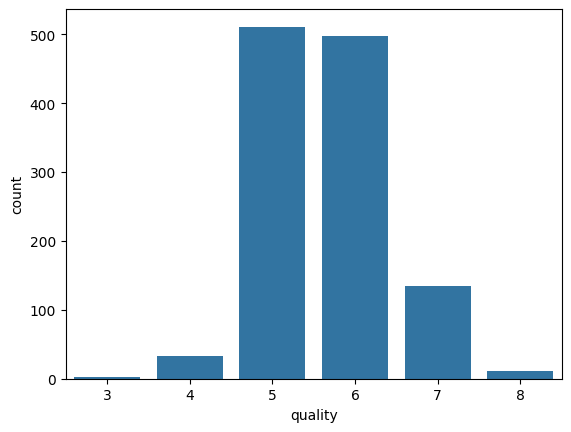

In [102]:
import seaborn as sns

ax = sns.countplot(x = 'quality', data = df_model)

A partir do histograma, temos que as notas das qualidades tem maior quantidade nas notas 5 e 6 em relação as demais notas, essa discrepância faz com que o nosso modelo não tenha precisão a notas que são diferentes de 5 e 6 tornando o nosso modelo impreciso, apartir disso, iremos fazer o processo de binarização das notas de modo que as notas iguais ou maiores que 7 é igua a 1 e inferiores é igual a 0. desse modo temos que o nosso modelo irá classificar se a nota de qualidade será maior ou igual a 7 ou menor que 7

In [103]:
df_model['quality'] = [1 if x >=7 else 0 for x in df_model['quality']]

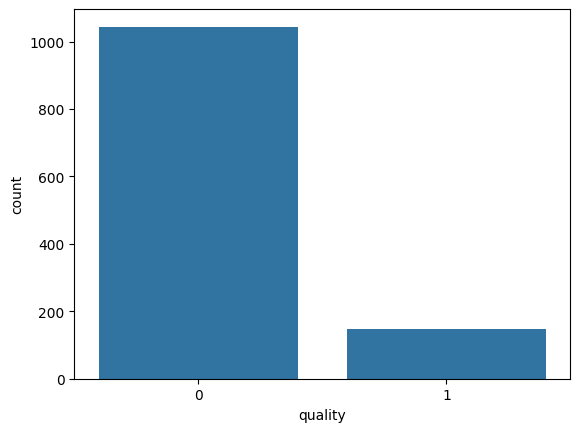

In [104]:
ax = sns.countplot(x = 'quality', data = df_model)

A partir do gráfico de count, iremos usar o pré processamento SMOTE que irá criar novos dados sintéticos com valor de qualidade igual a 1.

In [105]:
X2 = df_model[['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates','alcohol']]
y = df_model['quality']

smt = SMOTE(random_state = 101)

X2_resample, y_resample = smt.fit_resample(X2,y)

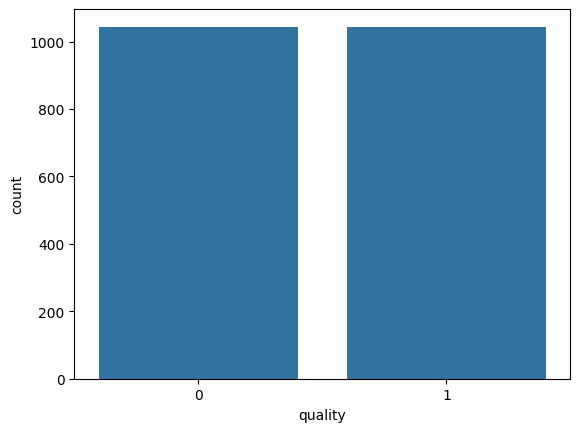

In [106]:
ax = sns.countplot(x = 'quality', data = pd.DataFrame(y_resample))

# Novo Modelo de SVC

In [107]:

# Criando dataset de treino e teste com os dados após o rebalanceamento e a conversão para o binário
X2_train, X2_test, y_train, y_test = train_test_split(X2_resample,y_resample,test_size = 0.2,random_state = 101 )

#pre processamento Scaling data
scaler = StandardScaler()
scaler.fit_transform(X2_train)
treino_x = scaler.transform(X2_train)
teste_x = scaler.transform(X2_test)



# treinando o modelo_SVC com Suport Vetorial Classification com as features pré processadas com scaler
seed = 101

modelo_SVC = SVC(random_state = seed)
modelo_SVC.fit(treino_x, y_train)
previsao = modelo_SVC.predict(teste_x)

# observando os resultados
acuracia = accuracy_score(y_test,previsao)*100
print("a acuracia do algoritimo foi de {} %".format(acuracia))

## F1 - Score

print(classification_report(y_test,previsao))

a acuracia do algoritimo foi de 85.16746411483254 %
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       217
           1       0.82      0.88      0.85       201

    accuracy                           0.85       418
   macro avg       0.85      0.85      0.85       418
weighted avg       0.85      0.85      0.85       418



## Cálculo do ROC e pontuação AUC para SVC

Pontuação AUC do modelo: 85.27 %


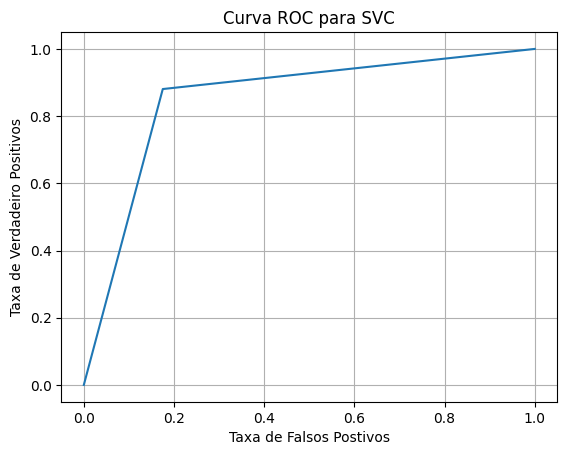

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, treshholds = roc_curve(y_test,previsao)
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Postivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.title('Curva ROC para SVC')
plt.grid()

print('Pontuação AUC do modelo: {} %'.format(roc_auc_score(y_test,previsao).round(4)*100))

In [109]:
# Calculando Base Line

dummy_most_freq = DummyClassifier(strategy='stratified' )
## usando a stratégic = 'stratifier' ou seja se num feature temos 30% 0 e 70% 1 o dummy utilizara 30% 0 e 70% 1 como base para o seu modelo base

dummy_most_freq.fit(treino_x,y_train)
acuracia = dummy_most_freq.score(teste_x,y_test)*100

#acuracia = accuracy_score(teste_y,previsao)*100
print("a acuracia do algoritimo de baseline dummy_most_freq foi {} %".format(acuracia.round(2)))

a acuracia do algoritimo de baseline dummy_most_freq foi 50.24 %


# Novo Modelo com Losgistic Regression

In [110]:

X2_train, X2_test, y_train, y_test = train_test_split(X2_resample,y_resample,test_size = 0.2,random_state = 101 )

#pre processamento Scaling data

scaler = StandardScaler()
scaler.fit_transform(X2_train)
treino_x = scaler.transform(X2_train)
teste_x = scaler.transform(X2_test)



# treinando o modelo_LR com logistc vetorial com as features pré processadas com scaler
modelo_LR = LogisticRegression()
modelo_LR.fit(treino_x, y_train)
previsao = modelo_LR.predict(teste_x)

# observando os resultados
acuracia = precision_score(y_test,previsao)*100
print("a acuracia do algoritimo foi de {} %".format(acuracia))

print(classification_report(y_test,previsao))



a acuracia do algoritimo foi de 79.6116504854369 %
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       217
           1       0.80      0.82      0.81       201

    accuracy                           0.81       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.81      0.81      0.81       418



In [111]:
dummy_most_freq = DummyClassifier(strategy='stratified' )
## usando a stratégic = 'stratifier' ou seja se num feature temos 30% 0 e 70% 1 o dummy utilizara 30% 0 e 70% 1 como base para o seu modelo base

dummy_most_freq.fit(treino_x,y_train)
acuracia = dummy_most_freq.score(teste_x,y_test)*100

#acuracia = accuracy_score(teste_y,previsao)*100
print("a acuracia do algoritimo de baseline dummy_most_freq foi {} %".format(acuracia.round(2)))

a acuracia do algoritimo de baseline dummy_most_freq foi 48.33 %


## Cálculo do ROC e pontuação AUC Logistic Regression

Pontuação AUC do modelo: 81.12 %


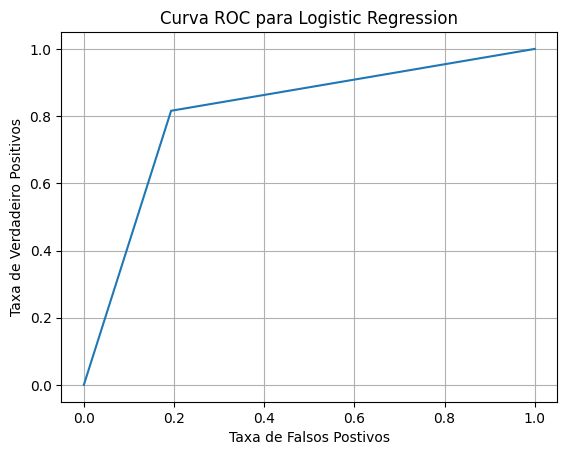

In [112]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, treshholds = roc_curve(y_test,previsao)
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Postivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.title('Curva ROC para Logistic Regression')

plt.grid()

print('Pontuação AUC do modelo: {} %'.format(roc_auc_score(y_test,previsao).round(4)*100))

In [113]:
# Calculando Base Line

dummy_most_freq = DummyClassifier(strategy='stratified' )
## usando a stratégic = 'stratifier' ou seja se num feature temos 30% 0 e 70% 1 o dummy utilizara 30% 0 e 70% 1 como base para o seu modelo base

dummy_most_freq.fit(treino_x,y_train)
acuracia = dummy_most_freq.score(teste_x,y_test)*100

#acuracia = accuracy_score(teste_y,previsao)*100
print("a acuracia do algoritimo de baseline dummy_most_freq foi {} %".format(acuracia.round(2)))

a acuracia do algoritimo de baseline dummy_most_freq foi 47.13 %


# Segunda conclusão

A partir da nova monipulação dos dados, chegamos a 2 modelos com capacidade predição das nota de qualdiade dos vinhos, um com modelo de Support Vetorial Classifier (SVC) com 86.12% de acurácia,85.27% de AUC e o segundo com modelo de Logistic Regression com 81.57% de acurácia, 81.12% de AUC e ambas a cima do valor de base line.

Assim, para o uso principal de predição será utilziado o modelo de SVC por possuir acurácia e pontuação AUC maior que a de Logistic Regression.

# Cálculo pontuais

In [114]:
X2[0:1]

,volatile acidity,total sulfur dioxide,density,sulphates,alcohol
0,0.7,34.0,0.9978,0.56,9.4


In [115]:

volatile_acidity = 0.7
total_sulfur_dioxide = 34
density = 0.9978
sulphates = 0.56
alchohol = 9.4

entrada = [[volatile_acidity,total_sulfur_dioxide,density,sulphates,alchohol]]

previsao = modelo_SVC.predict(entrada)[0]

print('A nota de qualidade será {}'.format('abaixo de 7' if previsao == 0 else 'igual ou maior de 7'))



A nota de qualidade será abaixo de 7


# Salvando o modelo

In [116]:
import pickle

# Save the model using pickle
with open('/content/drive/MyDrive/Machine Learing/Modelos/SVC_red_wine.pkl', 'wb') as file:
    pickle.dump(modelo, file)